In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tifffile

In [2]:
#im = Image.open("../data/lung_A_80kV.tif")
xray_80kV = tifffile.imread("/data/public/NANO_dual_energy/xrays/lung_A_80kV.tif")
xray_120kV = tifffile.imread("/data/public/NANO_dual_energy/xrays/lung_A_120kV.tif")
xray_140kV = tifffile.imread("/data/public/NANO_dual_energy/xrays/lung_A_140kV.tif")

# invert images (max is 65535)
xray_80kV = 65535 - xray_80kV
xray_120kV = 65535 - xray_120kV
xray_140kV = 65535 - xray_140kV

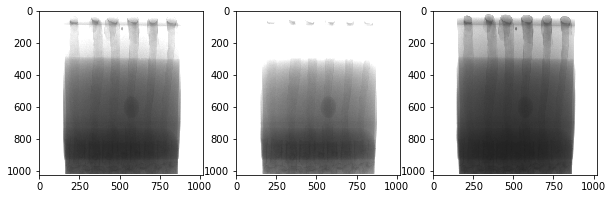

In [3]:
mean_0 = np.mean(xray_120kV[200:900,200:900])
std_0 = np.std(xray_120kV[200:900,200:900])
w=1
vmin = mean_0 - w*std_0
vmax = mean_0 + w*std_0

%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))
ax[0].imshow(xray_120kV, cmap='gray', vmin=vmin, vmax=vmax)
ax[1].imshow(xray_140kV, cmap='gray', vmin=vmin, vmax=vmax)
ax[2].imshow(xray_80kV, cmap='gray', vmin=vmin, vmax=vmax)

# Dual energy

In [4]:
processed_120 = 1000*np.log(xray_120kV/(np.max(xray_120kV)+0.0001))
processed_140 = 1000*np.log(xray_140kV/(np.max(xray_140kV)+0.0001))
processed_80 = 1000*np.log(xray_80kV/(np.max(xray_80kV)+0.0001))
processed_120[processed_120==np.inf] = 0
processed_140[processed_140==np.inf] = 0
processed_80[processed_80==np.inf] = 0

weight = 0.65
dual_energy_soft = processed_140 - weight*processed_80
weight = 1
dual_energy_bone = -1*(processed_140 - weight*processed_80)

/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':
/usr/local/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'120')

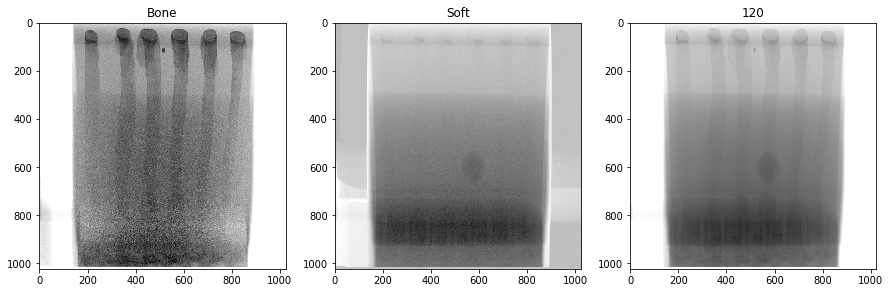

In [5]:
mean_s = np.mean(dual_energy_soft[200:900,200:900])
std_s = np.std(dual_energy_soft[200:900,200:900])
w=3
vmin_s = mean_s - w*std_s
vmax_s = mean_s + w*std_s

mean_b = np.mean(dual_energy_bone[200:900,200:900])
std_b = np.std(dual_energy_bone[200:900,200:900])
w=3
vmin_b = mean_b - w*std_b
vmax_b = mean_b + w*std_b

mean_0 = np.mean(processed_120[200:900,200:900])
std_0 = np.std(processed_120[200:900,200:900])
w=3
vmin = mean_0 - w*std_0
vmax = mean_0 + w*std_0

%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
ax[0].imshow(dual_energy_bone, cmap='gray', vmin=vmin_b, vmax=vmax_b)
ax[0].set_title('Bone')
ax[1].imshow(dual_energy_soft, cmap='gray', vmin=vmin_s, vmax=vmax_s)
ax[1].set_title('Soft')

ax[2].imshow(processed_120, cmap='gray', vmin=vmin, vmax=vmax)
ax[2].set_title('120')